In [1]:
from huggingface_hub import HfApi
available_pipelines = [p.modelId for p in HfApi().list_models(filter="pyannote-audio-pipeline")]
list(filter(lambda p: p.startswith("pyannote/"), available_pipelines))

['pyannote/overlapped-speech-detection',
 'pyannote/speaker-diarization',
 'pyannote/speaker-segmentation',
 'pyannote/voice-activity-detection',
 'pyannote/speaker-diarization-3.0']

In [2]:
from huggingface_hub import notebook_login
notebook_login()

In [3]:
from pyannote.audio import Pipeline
pipeline = Pipeline.from_pretrained("pyannote/speaker-diarization@develop", use_auth_token=True)

The torchaudio backend is switched to 'soundfile'. Note that 'sox_io' is not supported on Windows.
The torchaudio backend is switched to 'soundfile'. Note that 'sox_io' is not supported on Windows.
Lightning automatically upgraded your loaded checkpoint from v1.5.4 to v2.0.9. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file C:\Users\34691\.cache\torch\pyannote\models--pyannote--segmentation\snapshots\c4c8ceafcbb3a7a280c2d357aee9fbc9b0be7f9b\pytorch_model.bin`


Model was trained with pyannote.audio 0.0.1, yours is 3.0.0. Bad things might happen unless you revert pyannote.audio to 0.x.
Model was trained with torch 1.10.0+cu102, yours is 2.0.1+cu118. Bad things might happen unless you revert torch to 1.x.


In [11]:
import os

ROOT_DIR = os.path.join('E:Files', 'Acoustic Data')
print(ROOT_DIR)

AUDIO_FILE = os.path.join('E:\Files', 'Acoustic Data', 'DSFAS_Chen', 'Fig4_Eructation_1.wav')
#AUDIO_FILE_2 = r'E:\Files\Acoustic Data\DSFAS_Chen\Fig4_Eructation_1.wav'  # Corrected path
#AUDIO_FILE_1 = os.path.join('E:\Files', 'Acoustic Data', 'whole_audio.wav')
#AUDIO_FILE_2 = r'E:\Files\Acoustic Data\whole_audio.wav'  # Corrected path

dia = pipeline(AUDIO_FILE)



E:Files\Acoustic Data


In [12]:
from pyannote.core import Annotation
assert isinstance(dia, Annotation)

In [14]:
for speech_turn, track, speaker in dia.itertracks(yield_label=True):
    print(f"{speech_turn.start:4.1f} {speech_turn.end:4.1f} {speaker}")

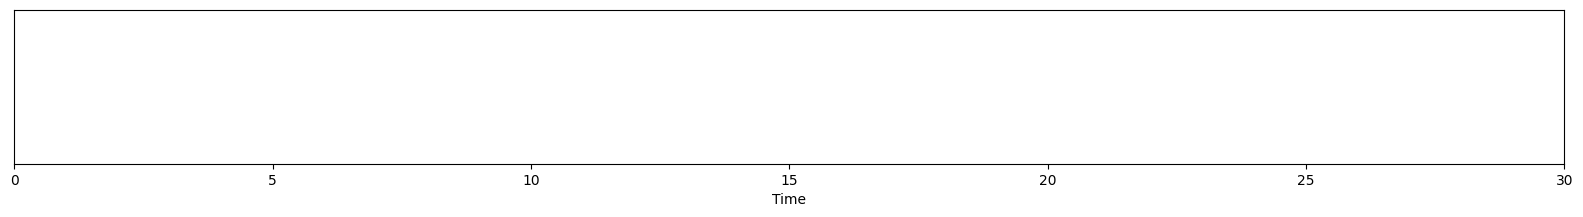

In [15]:
# we visualize [0, 30] time range
from pyannote.core import notebook, Segment
notebook.crop = Segment(0, 30)
dia